In [1]:
import pandas as pd
df=pd.read_csv("IRIS.csv")

In [2]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

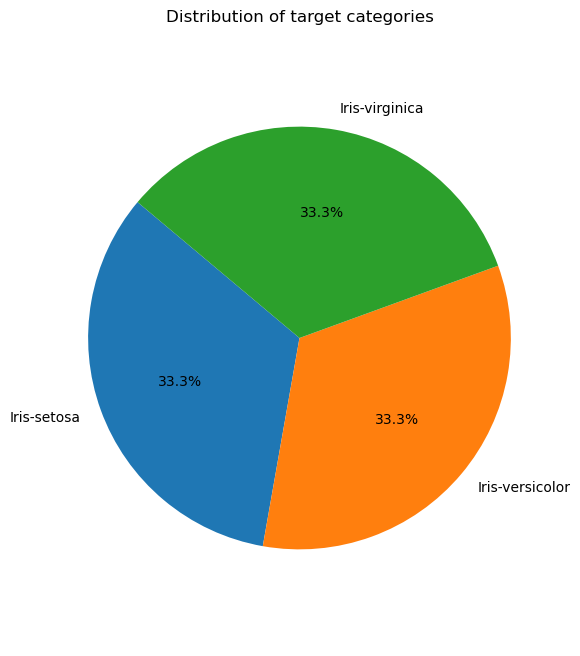

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
class_count=df['species'].value_counts()
plt.pie(class_count,labels=class_count.index,autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Distribution of target categories")
plt.show()

# Data target is balanced, so good

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])
df

c:\Users\RPC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\RPC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Etude of correlation between all variables

In [7]:
import seaborn as sns

In [8]:
matrix_correlation=df.corr()
matrix_correlation

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


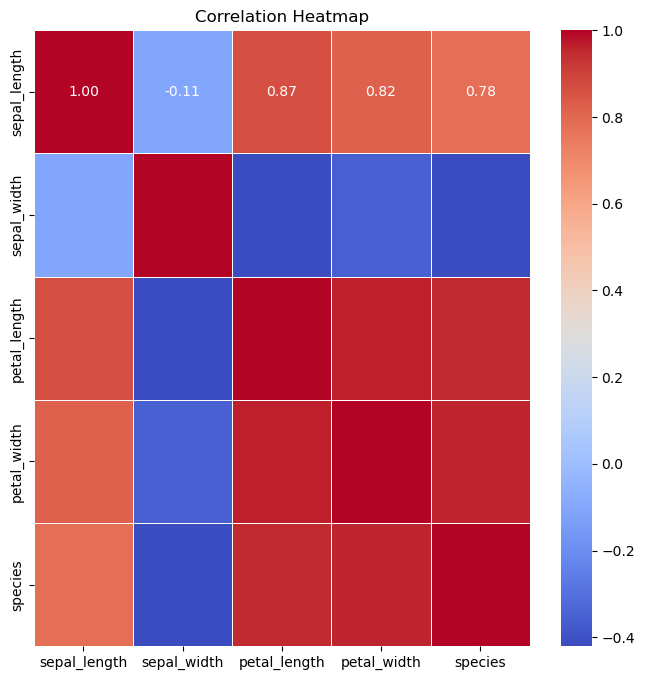

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(matrix_correlation,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### I show that the most attributes are related to each other, so we will try to remove some attributes.

In [10]:
df.drop(columns=['sepal_width','sepal_length','petal_length'], inplace=True)
df

,petal_width,species
0,0.2,0
1,0.2,0
2,0.2,0
3,0.2,0
4,0.2,0
...,...,...
145,2.3,2
146,1.9,2
147,2.0,2
148,2.3,2


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Create a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [12]:
# Split data into features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Evaluate each classifier
results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)  # Train the classifier
    y_pred = classifier.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}")

Logistic Regression: Accuracy = 1.00
Decision Tree: Accuracy = 1.00
Random Forest: Accuracy = 1.00
Support Vector Machine: Accuracy = 1.00
K-Nearest Neighbors: Accuracy = 1.00


# Confusion matrix

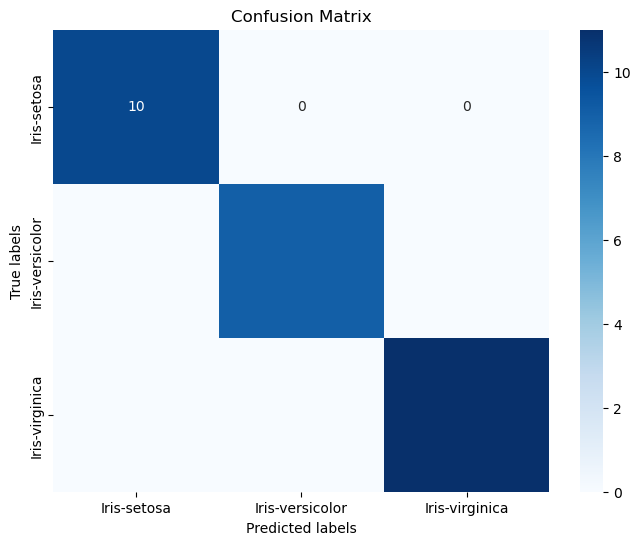

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
best_classifier = classifiers["Logistic Regression"] 
best_classifier.fit(X, y)

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Define class names
class_names =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  # Replace with your actual class names

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [16]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [15]:
from joblib import dump
dump(best_classifier, "best_classifier.joblib")


['best_classifier.joblib']